<img src="https://github.com/gantian127/pymt_era5/blob/master/docs/_static/logo.png?raw=true" width='600' align='center'></a>

## Basic Info
This Jupyter Notebook was created by Tian Gan. You can run this Jupyter Notebook through [HydroShare](https://www.hydroshare.org/resource/765e4e8bebab4eea8d72ee447a27c2fa/).

If you have any suggestion to improve the current functions of the pymt_era5 package, please create a github issue [here](https://github.com/gantian127/pymt_era5).

Suggested citation: Gan, T. (2021). Jupyter Notebooks for the ERA5 Data Component, HydroShare, https://www.hydroshare.org/resource/765e4e8bebab4eea8d72ee447a27c2fa/

## Introduction

[pymt_era5](https://github.com/gantian127/pymt_era5) is a package that uses the [bmi_era5](https://github.com/gantian127/bmi_era5) pacakge to convert ERA5 datasets into a reusable, plug-and-play data component for PyMT modeling framework developed by Community Surface Dynamics Modeling System ([CSDMS](https://csdms.colorado.edu/wiki/Main_Page)). This allows ERA5 datasets (currently support 3 dimensional data) to be easily coupled with other datasets or models that expose a Basic Model Interface.

### Install pymt

If you run this notebook on [HydroShare](https://www.hydroshare.org/resource/765e4e8bebab4eea8d72ee447a27c2fa/), please skip this step. Otherwise, please follow the [instructions](https://github.com/gantian127/pymt_era5/blob/master/README.rst) to create a separate environment and install pymt.

### Install pymt_era5

Let's first use a helper function to install the CDS API, which is a Python package used by pymt_era5 to download the ERA5 data. install_cds( ) function will ask for your CDS API Key. So please make sure you have already created an account at the [CDS registration page](https://cds.climate.copernicus.eu/#!/home) and obtained your CDS API Key. For more details please check [here](https://cds.climate.copernicus.eu/api-how-to).

In [ ]:
from installation import install_cds
install_cds()

After you successfully run the helper function above, use the following command to install the pymt_era5 package. 

In [ ]:
!pip install pymt_era5

## Coding Examples

This section provides two examples to demonstrate how to use the CDS API and the pymt_era5 package to download the same ERA5 dataset for visualization.

### Example 1: use CDS API to download the ERA5 data¶

Import cdsapi module and create an object from the "Client" class. Use retrieve( ) method to make a request for data download. You can check the details of the parameter settings for a request from the [CDS web interface](https://confluence.ecmwf.int/display/CKB/How+to+download+ERA5#HowtodownloadERA5-3-DownloadingonlineERA5familydatathroughtheCDSwebinterface). 

In this example, it downloads the ERA5 hourly reanalysis data on single level for 2 metre temperature and total precipitation in Colorado on Jan 1st, 2021. The grid resolution is 0.25 degree. The dataset is saved in a netCDF file. 

Please note that sometimes your request may be in queue, which will take more than 10 minutes to download the dataset. If you get the "authentication error", this may be caused by wrong CDS API Key you provided when you run install_cds( ) function. You can rerun this function and make sure to enter the right API Key.

In [1]:
import cdsapi
import xarray
import matplotlib.pyplot as plt

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': ['2m_temperature', 'total_precipitation'],
        'year': '2021',
        'month': '01',
        'day': '01',
        'time': [ '00:00', '01:00', '02:00'],
        'area': [ 41, -109, 36, -102],
        'grid': [0.25, 0.25]
    },
    'download.nc')

2022-08-15 14:09:18,917 INFO Welcome to the CDS
2022-08-15 14:09:18,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-08-15 14:09:19,134 INFO Request is completed
2022-08-15 14:09:19,135 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/adaptor.mars.internal-1660594075.4443913-4469-11-f3d34087-fe3f-4c0d-8e27-2861ab29458c.nc to download.nc (8.6K)
2022-08-15 14:09:19,772 INFO Download rate 13.6K/s                              


Result(content_length=8836,content_type=application/x-netcdf,location=https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/adaptor.mars.internal-1660594075.4443913-4469-11-f3d34087-fe3f-4c0d-8e27-2861ab29458c.nc)

Use xarray to load the netCDF file and select the data for the 2 metre temperature on 2021-01-01 at 00:00.

In [2]:
# load netCDF data
dataset = xarray.open_dataset('download.nc')

# select 2 metre temperature on 2021-01-01 at 00:00
air_temp = dataset.t2m.isel(time=0)

The temperature dataset is loaded as a DataArray object (xarray). You can directly plot the data using its plot( ) method.

Text(0.5, 1.0, '2 metre temperature in Colorado on Jan 1st, 2021 at 00:00')

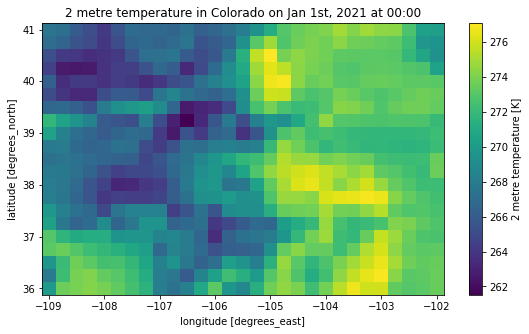

In [3]:
# plot data
air_temp.plot(figsize=(9,5))
plt.title('2 metre temperature in Colorado on Jan 1st, 2021 at 00:00')

### Example 2: use pymt_era5 to download the ERA5 data 

Import Era5 class and instantiate it. A configuration file (yaml file) is required to provide the parameter settings for data download. An example yaml file is provided in the same folder with this Jupyter Notebook. 

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from pymt.models import Era5

# initiate a data component
data_comp = Era5()
data_comp.initialize('config_file.yaml')

2022-08-15 14:10:29,148 INFO Welcome to the CDS
2022-08-15 14:10:29,149 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-08-15 14:10:29,322 INFO Request is completed
2022-08-15 14:10:29,324 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/adaptor.mars.internal-1660594075.4443913-4469-11-f3d34087-fe3f-4c0d-8e27-2861ab29458c.nc to single_hour.nc (8.6K)
2022-08-15 14:10:29,914 INFO Download rate 14.6K/s                              


If you check the contents in the config_file.yaml, you will find out that the parameters are the same as the parameters specified in the retrieve( ) method from the CDS API. 

In [5]:
!cat config_file.yaml

bmi-era5:
  name: reanalysis-era5-single-levels
  request:
    variable:
      - 2m_temperature
      - total_precipitation
    product_type: reanalysis
    year: 2021
    month: 01
    day: 01
    time:
      - 00:00
      - 01:00
      - 02:00
    format: netcdf
    area:
      - 41
      - -109
      - 36
      - -102
    grid:
      - 0.25
      - 0.25
  path: single_hour.nc


Use variable related methods to check the variable information of the ERA5 dataset.

In [6]:
# get variable info
for var_name in data_comp.output_var_names:
    var_unit = data_comp.var_units(var_name)
    var_location = data_comp.var_location(var_name)
    var_type = data_comp.var_type(var_name)
    var_grid = data_comp.var_grid(var_name)
    var_itemsize = data_comp.var_itemsize(var_name)
    var_nbytes = data_comp.var_nbytes(var_name)

    print('variable_name: {} \nvar_unit: {} \nvar_location: {} \nvar_type: {} \nvar_grid: {} \nvar_itemsize: {}'
        '\nvar_nbytes: {} \n'. format(var_name, var_unit, var_location, var_type, var_grid, var_itemsize, var_nbytes))

variable_name: 2 metre temperature 
var_unit: K 
var_location: node 
var_type: float64 
var_grid: 0 
var_itemsize: 2
var_nbytes: 1218 

variable_name: Total precipitation 
var_unit: m 
var_location: node 
var_type: float64 
var_grid: 0 
var_itemsize: 2
var_nbytes: 1218 



Use time related methods to check the time information of the ERA5 dataset. The time values are stored in a format which follows [CF convention](http://cfconventions.org/Data/cf-conventions/cf-conventions-1.8/cf-conventions.pdf).

In [7]:
# get time info
start_time = data_comp.start_time
end_time = data_comp.end_time
time_step = data_comp.time_step
time_units = data_comp.time_units
time_steps = int((end_time - start_time)/time_step) + 1

print('start_time: {} \nend_time: {} \ntime_step: {} \ntime_units: {} \ntime_steps: {}'.format(
        start_time, end_time, time_step, time_units, time_steps))

start_time: 1060680.0 
end_time: 1060682.0 
time_step: 1.0 
time_units: hours since 1900-01-01 00:00:00.0 
time_steps: 3


Use grid related methods to check the grid information of the ERA5 dataset. 

In [8]:
# get variable grid info
grid_type = data_comp.grid_type(var_grid)
grid_rank = data_comp.grid_ndim(var_grid)
grid_shape = data_comp.grid_shape(var_grid)
grid_spacing = data_comp.grid_spacing(var_grid)
grid_origin = data_comp.grid_origin(var_grid)

print('grid_type: {} \ngrid_rank: {} \ngrid_shape: {} \ngrid_spacing: {} \ngrid_origin: {}'.format(
    grid_type, grid_rank, grid_shape, grid_spacing, grid_origin))

grid_type: uniform_rectilinear 
grid_rank: 2 
grid_shape: [21 29] 
grid_spacing: [ 0.25  0.25] 
grid_origin: [  36. -109.]


Use get_value( ) method to get the temperature data as a numpy array. Please note that the default behavior of pymt components is to flatten data arrays. So make a new variable that restores the dimensionality of the data.

In [9]:
# get variable data
data = data_comp.get_value('2 metre temperature')
data_2D = data.reshape(grid_shape)

print(data.shape, data_2D.shape)

(609,) (21, 29)


Now let's make a plot of the temperature data. 

Text(0.5, 1.0, '2 metre temperature in Colorado on Jan 1st, 2021 at 00:00')

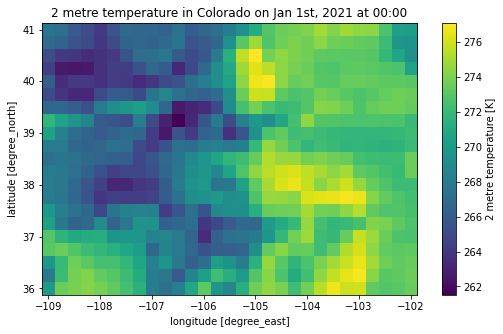

In [10]:
# get X, Y extent for plot
min_y, min_x = grid_origin
max_y = min_y + grid_spacing[0]*(grid_shape[0]-1)
max_x = min_x + grid_spacing[1]*(grid_shape[1]-1)
dy = grid_spacing[0]/2
dx = grid_spacing[1]/2
extent = [min_x - dx, max_x + dx, min_y - dy, max_y + dy]

# plot data
fig, ax = plt.subplots(1,1, figsize=(9,5))
im = ax.imshow(data_2D, extent=extent)
cbar = fig.colorbar(im)
cbar.set_label('2 metre temperature [K]')
plt.xlabel('longitude [degree_east]')
plt.ylabel('latitude [degree_north]')
plt.title('2 metre temperature in Colorado on Jan 1st, 2021 at 00:00')

Complete the example by finalizing the component. finalize( ) method performs tasks that take place after using the data component, such as deallocating memory and closing files.

In [11]:
data_comp.finalize()